# Title
*Term Deposit Subscription Prediction_20200210_01_VinuPillai*

## Purpose
Using the data collected from existing customers, goal is to build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Methodology
Below is a brief description of the methodology taken to solve the problem

### Assumptions

### Processing steps
* **Univariate analysis** - data types and description of the independent attributes include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
* **Multivariate analysis** - Bi-variate analysis between the predictor variables and target column is done and findings are listed in terms of their relationship and degree of relation. Visualization is done using various plots and most appropriate attributes are chosen.
* **Data pollution**, **Outliers detection** and **Missing values** are addressed.
* Dataset is loaded and investigated for discrepancies.
* Scaling or normalization is done as appropriate and a **Test**, **Train** data is split for model building.
* An ensemble model is built and trained using a standard classification algorithm.
* Model is evaluated and a confusion matrix is analyzed along with an overall score. Advantages and disadvantages are enumerated.
* Finally key hyper parameters are listed for the selected algorithm.

### Input Variables
#### Bank Client data
* 1 - age (numeric)
* 2 - job : type of job (categorical)
* 3 - marital : marital status (categorical: 'divorced','married','single', note: 'divorced' means divorced or widowed)
* 4 - education (categorical: ‘primary’, ‘secondary’, ‘tertiary’, ‘unknown’)
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - balance – average yearly balance in euros(numeric)
* 7 - housing: has housing loan? (categorical: 'no','yes’)
* 8 - loan: has personal loan? (categorical: 'no','yes')

#### Last contact details of the current campaign:
* 9 - contact: contact communication type (categorical: 'cellular','telephone', ‘unknown’)
* 10 - date: last contact date of the month (categorical: '1','2','3','4','5' and so on)
* 11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other Attributes:
* 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'other', 'success', ‘unknown’)

### Output Variable
* 17 - has the client subscribed a term deposit? (binary: 'yes','no')

# Setup

## Library import
We import all the required Python libraries

In [530]:
# Data manipulation modules
import pandas as pd
import numpy as np

# Collection and iteration utils
from collections import Counter
import itertools

# Scikit learn related modules
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
# Scikit learn related classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
# Scikit learn related scaling and normalization modules
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations plotly
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

# Cufflinks for plotly on dataframe
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

# display status and rendering
import ipywidgets as widgets
from IPython.display import display,clear_output

# Visualizations Seaborn and matplotlib
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
mpl.rcParams['axes.titlesize'] = '18'
mpl.rcParams['axes.labelsize'] = '14'
mpl.rcParams['xtick.labelsize'] = '14'
mpl.rcParams['ytick.labelsize'] = '14'

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.1.


## Generic Functions

In [637]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    #plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\n\naccuracy={:0.4f}; miss-classification={:0.4f}'.format(accuracy, misclass))

def print_model_score(model_name, y_actual, y_predictions):
    print('Model Score Summary for ' + model_name)
    print('------------------------------------------------------')
    print(classification_report(y_actual, y_predictions))

def print_class_weights(classes, y_variable):
    # computing the class weight ratio
    weighting = compute_class_weight('balanced', classes, y_variable)
    print(weighting)

def print_model_performance(model, X_test_actuals, y_test_actuals):
    print('Accuracy = {:0.4f}%.'.format(model.score(X_test_actuals, y_test_actuals) * 100))
    
def plot_roc_curve(model, estimator_name, x, y):
    print('ROC Curve Plots and Characteristics')
    print('------------------------------------------------------')
    roc_auc = roc_auc_score(y, model.predict(x))
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label=estimator_name + ' (area = %0.2f)' % roc_auc)
    
    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='g', linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold')
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    #ax2.set_xlim([fpr[0],fpr[-1]])
    
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

def feature_importance_range(model, rounded=0):
    val = model.feature_importances_
    return round(min(val), rounded), round(max(val), rounded), round(np.median(DT_model.feature_importances_), rounded)

def plot_feature_importance(model, columns, threshold=0):
    feature_importances = pd.DataFrame({'importance': model.feature_importances_})    
    feature_importances['feature'] = columns
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)
    feature_importances = feature_importances[feature_importances['importance'] > threshold]
    feature_importances = feature_importances.set_index('feature')
    p1 = feature_importances.plot.bar(title='Feature Importance', figsize=(15, 8))
    for p in p1.patches:
        text = p1.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2, p.get_height() + 0.01), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        text.set_rotation(90)
    plt.xlabel('Feature Importance Score')
    plt.legend(loc='best')
    plt.show()
    return feature_importances.index

def plot_heat_map(data):
    #get correlations of each features in dataset
    corrmat = data.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(12,10))
    #plot heat map
    g=sns.heatmap(data[top_corr_features].corr(),annot=True, cmap="RdYlGn")
    plt.show()

def estimator_validation_curve(estimator, independants, target, axis, title, param_name, param_range, scoring):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    train_scores, test_scores = validation_curve(
        estimator, independants, target, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.axes(axis)
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

def estimator_learning_curve(estimator, independants, target, axis, title):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    train_sizes, train_scores, test_scores = learning_curve(estimator, independants, target, cv=cv, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.axes(axis)
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    return plt

def estimator_score(model, x, y):
    p, r, f1, _ = precision_recall_fscore_support(y, model.predict(x), average='weighted')
    return pd.Series([p, r, f1], index=['precision', 'recall', 'fscore'])

def estimators_scores(models, x, y):
    d = pd.DataFrame()
    for i in range(0, len(models)):
        d[models[i][0]] = estimator_score(models[i][1], x, y)
    return d

def plot_roc_curves(models, x, y):
    print('ROC Curve Plots')
    print('------------------------------------------------------')
    plt.figure(figsize=(10, 7))
    for model, i in zip(models, range(0, len(models))):
        roc_auc = roc_auc_score(y, models[i][1].predict(x))
        fpr, tpr, thresholds = roc_curve(y, models[i][1].predict_proba(x)[:,1])
        plt.plot(fpr, tpr, label=models[i][0] + ' (area = %0.2f)' % roc_auc)
        
    #plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

def plot_estimator_precision_recall(model, estimator_name, x, y):
    print('Precision Recall Curve Plot')
    print('------------------------------------------------------')
    fig, ax1 = plt.subplots()
    precision, recall, thresholds = precision_recall_curve(y, model.predict_proba(x)[:,1])
    plt.plot(recall, precision, label=estimator_name)
    ax2 = ax1.twinx()
    plt.plot(thresholds, markeredgecolor='g', linestyle='dashed', color='r')
    plt.ylim([-0.01, 1.01]) 
    plt.xlim([-0.01, 1.01])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc='best')
    plt.show()
    
def plot_estimator_precision_recall_curve(estimator, x, y):
    average_precision = average_precision_score(y, estimator.predict(x))
    disp = plot_precision_recall_curve(estimator, x, y)
    disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.5f}'.format(average_precision))

# Data import
The required data for analysis is imported here. It is available in a **'bank-full.csv'**. After loading we check if the data is loaded correctly.

In [4]:
bankCampaign = pd.read_csv('bank-full.csv')
bankCampaign['Target_encoded'] = LabelEncoder().fit_transform(bankCampaign['Target'])
bankCampaign.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Target_encoded
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,0


## Investigate the loaded data

Shape of the data loaded is checked to see the number of features and number of observations. The data has 45211 rows and 17 columns

In [5]:
bankCampaign.shape

(45211, 18)

Check if the data has any null values

In [6]:
bankCampaign.isna().sum()

age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Target            0
Target_encoded    0
dtype: int64

Printing the overall data sets columns and their attribute types

In [7]:
bankCampaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education       45211 non-null  object
 4   default         45211 non-null  object
 5   balance         45211 non-null  int64 
 6   housing         45211 non-null  object
 7   loan            45211 non-null  object
 8   contact         45211 non-null  object
 9   day             45211 non-null  int64 
 10  month           45211 non-null  object
 11  duration        45211 non-null  int64 
 12  campaign        45211 non-null  int64 
 13  pdays           45211 non-null  int64 
 14  previous        45211 non-null  int64 
 15  poutcome        45211 non-null  object
 16  Target          45211 non-null  object
 17  Target_encoded  45211 non-null  int64 
dtypes: int

The dataset contains 17 columns. It has 7 columns that are numeric and 10 columns that are categorical.

Printing the nature of the numeric data in terms of minimum, maximum, different quartiles and the means is shown below

In [8]:
bankCampaign.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
Target_encoded,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


The numeric columns have the following observations
* Age column is having a median of 39 and has outliers
* balance column has a wide range in terms of scale of values that will need normalizing
* day column is pretty uniform
* Campaign column is having a skewness with outliers
* pdays has a lot of values near -1. max value s 871 which indicates skewness
* previous column has majority of the values at 0 

In [9]:
# extracting the target variable that needs to be predicted.
predictor_feature = bankCampaign.Target_encoded

# Plotting and Exploratory Data Analysis

## Univariate Plotting
Let us plot all the columns based on their type to visualize the distributions and how many values lie at what ranges. Numeric values are plotted as histograms, categorical values are plotted as bars

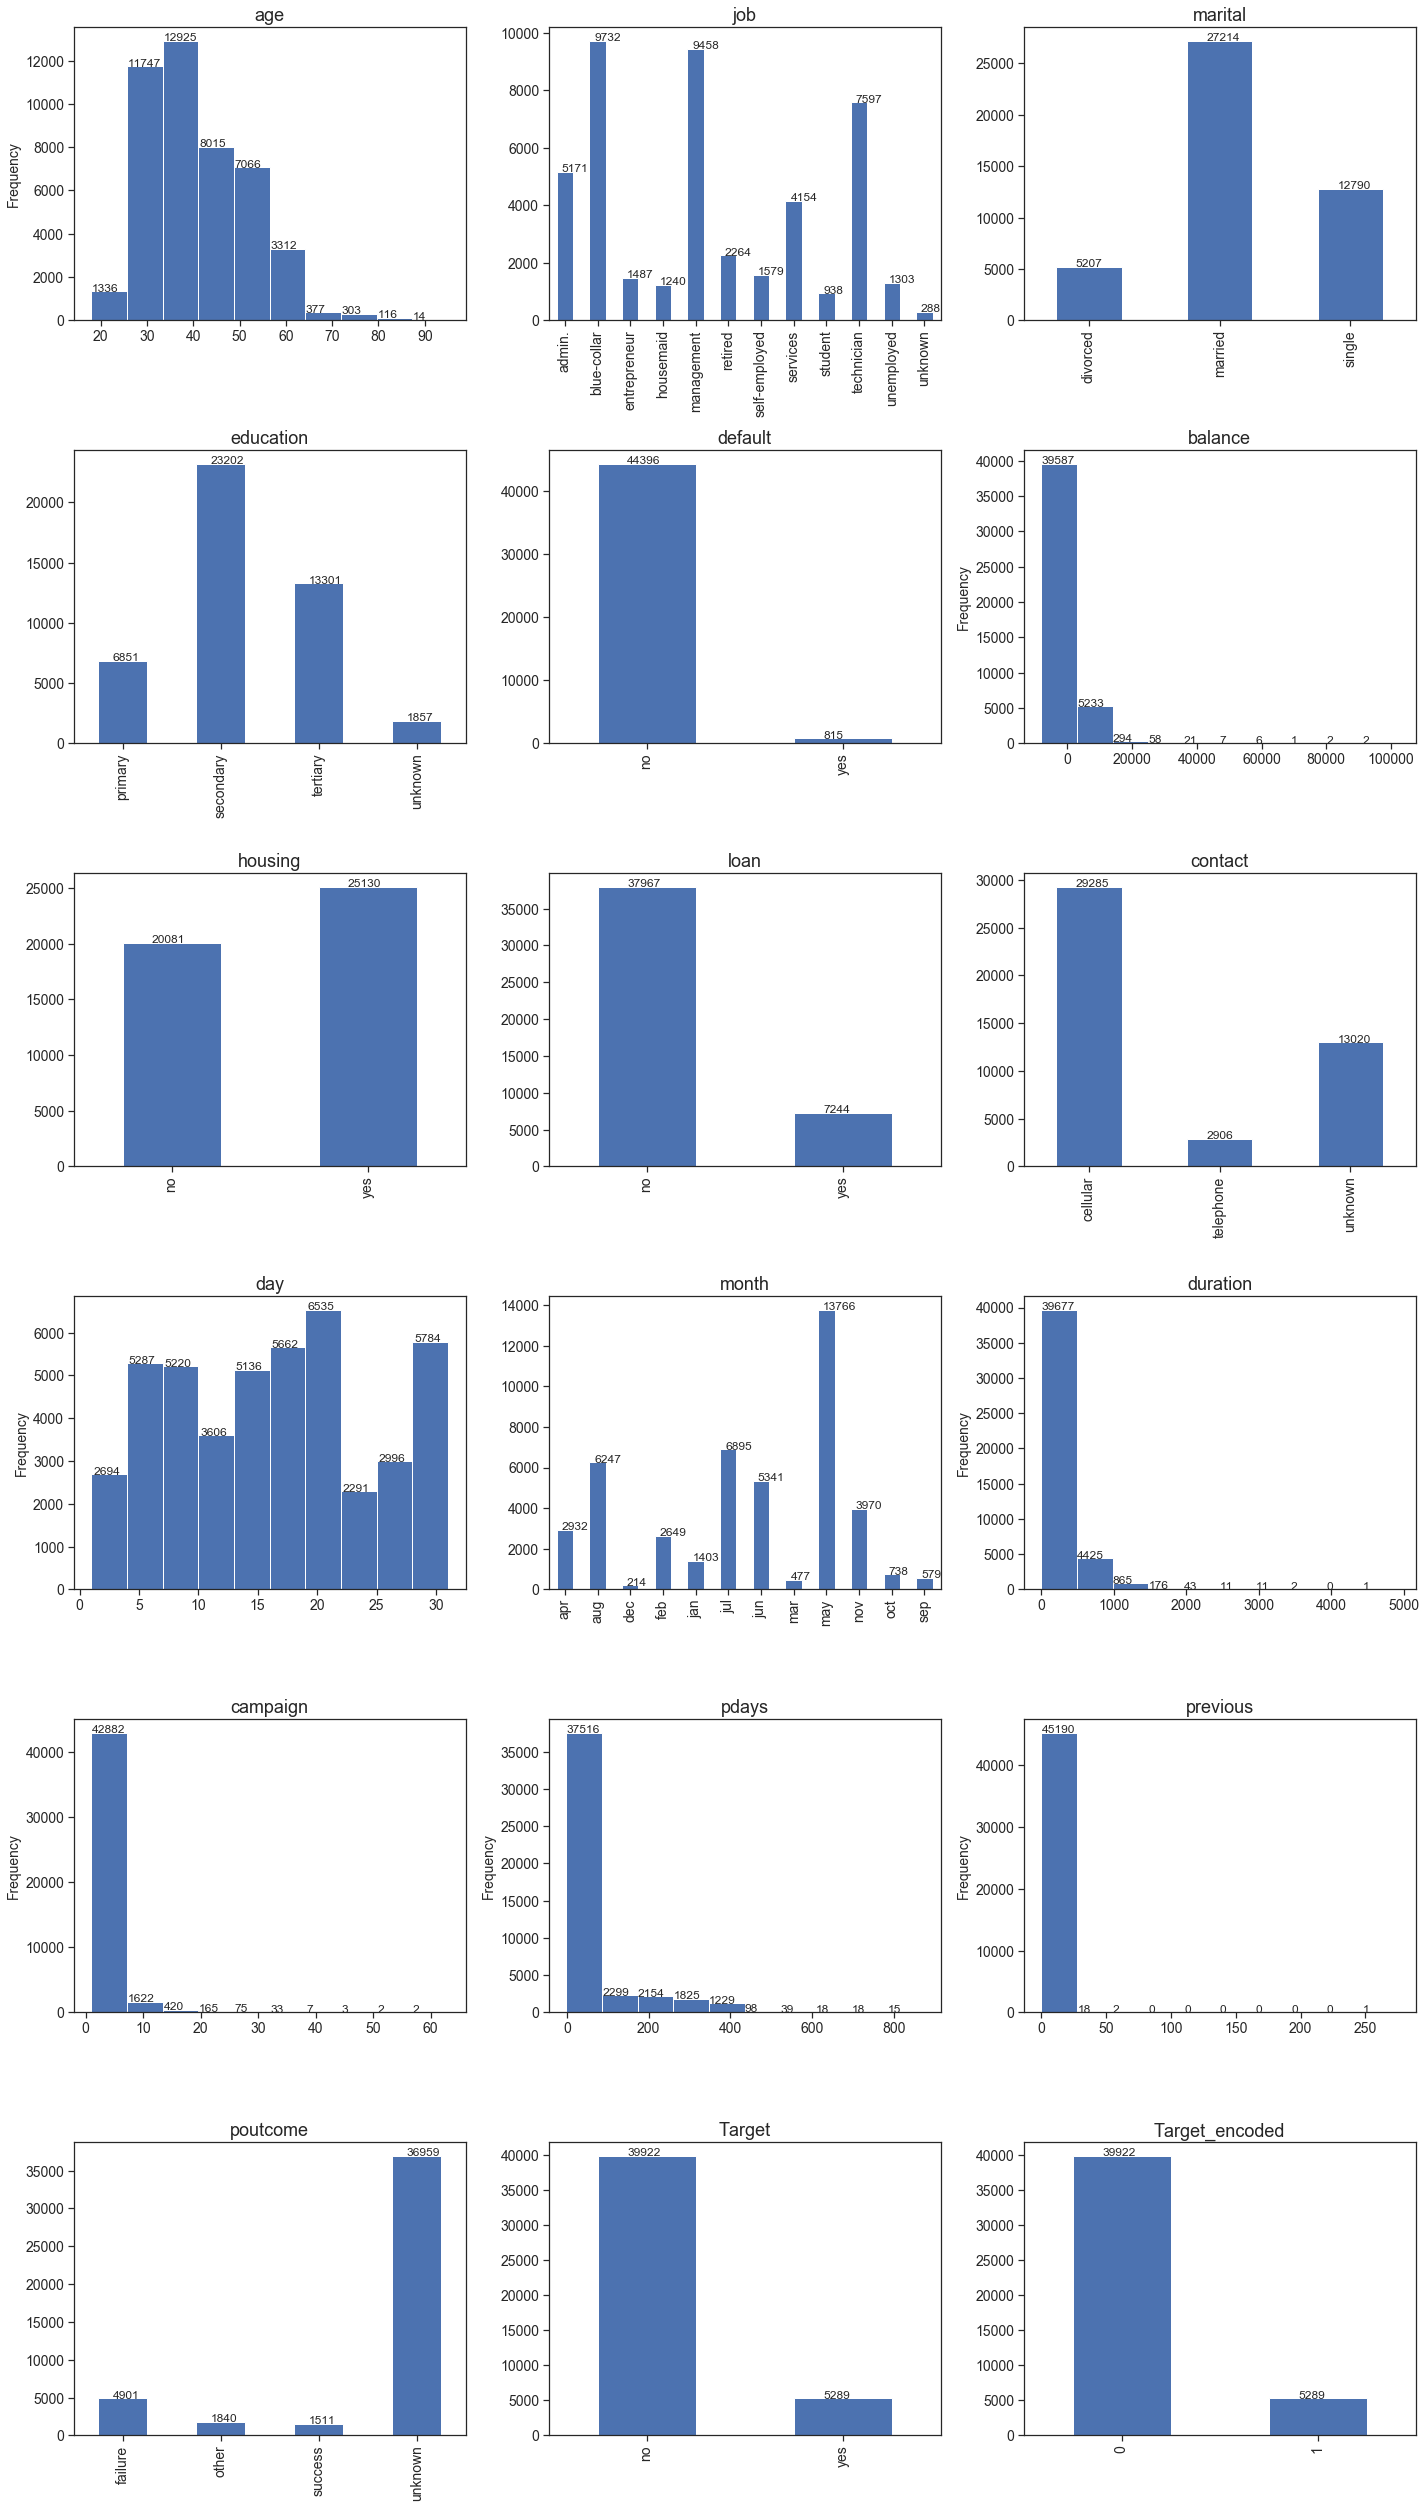

In [10]:
plot_types = {
    'age': 'hist',
    'job': 'bar',
    'marital': 'bar',
    'education': 'bar',
    'default': 'bar',
    'balance': 'hist',
    'housing': 'bar',
    'loan': 'bar',
    'contact': 'bar',
    'day': 'hist',
    'month': 'bar',
    'duration': 'hist',
    'campaign': 'hist',
    'pdays': 'hist',
    'previous': 'hist',
    'poutcome': 'bar',
    'Target': 'bar',
    'Target_encoded': 'bar'
}
fig = plt.figure(figsize=(20, 35))
for feature, num in zip(bankCampaign.columns, range(1, len(bankCampaign.columns) + 1)):
    ax = fig.add_subplot(6, 3, num)
    ax.set_title(feature)
    if plot_types[feature] == 'hist':
        bankCampaign[feature].sort_index().plot(kind=plot_types[feature])
    elif plot_types[feature] == 'bar':
        bankCampaign[feature].value_counts().sort_index().plot(kind=plot_types[feature])
    elif plot_types[feature] == 'line':
        bankCampaign[feature].value_counts().sort_index().plot(kind=plot_types[feature])
    elif plot_types[feature] == 'dist':
        sns.distplot(bankCampaign[feature])
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.15, p.get_height()))
plt.tight_layout()
plt.show()

Following are the observations from the above plots
* **age** - Majority of the people in the dataset are in their 30s and 40s with some in their 50s 60s.
* **job** - blue collar, management, technician, admin and services are the categories which appear the most. Other categories have few observations.
* **marital** - majority of the people are married in the dataset.
* **education** - majority have secondary education with a few unknowns. This needs to be investigated for imputation.
* **default** - Majority have not defaulted
* **balance** - This column has a lot of imbalance in the distribution. There is a lot of outliers that needs to be treated.
* **housing** - This column has somewhat equal representation of 'yes' and 'no' with 'yes' being higher. Majority has a housing loan.
* **loan** - Majority of people don't have a personal loan.
* **contact** - This column needs treatment due to presence of 'unknown' values.
* **day** - This column is fairly distributed and doesn't need treatment.
* **month** - Has valid values and doesn't need treatment.
* **duration** - This column has skewness and needs normalizing.
* **campaign** - This column needs to be normalized due to skewness in the data
* **pdays** - This column needs to be normalized due to skewness in the data
* **previous** - This column needs to be normalized due to skewness in the data
* **poutcome** - There are a lot of 'unknown' values that need treatment by imputation. Unknown can be treated as failure for giving the benefit of the campaign outcome.
* **Target** - The target variable is highly imbalanced 39922:5289

## Correlation Matrix for numeric variables
A plot of the variables that are correlated in the dataset for numerical data is shown below

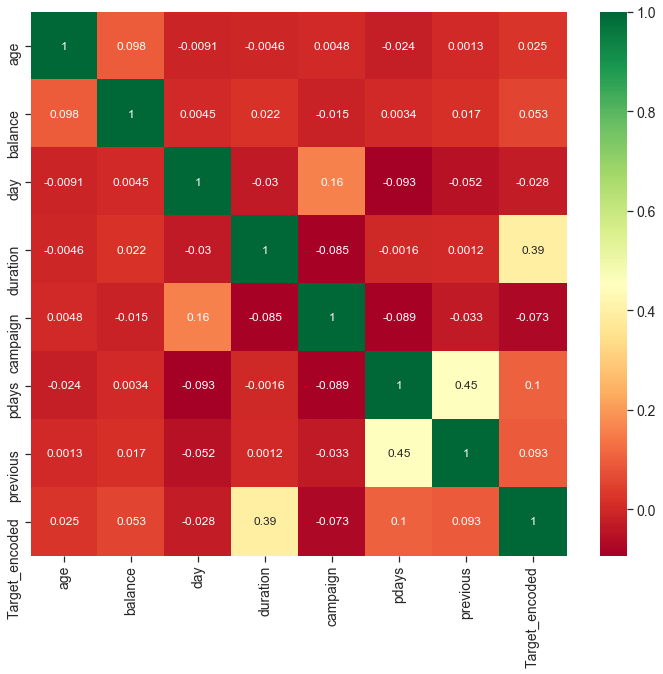

In [11]:
plot_heat_map(bankCampaign)

## Removing low correlated data

Since campaign is having negative correlation to target variable, it will be removed. 'day' attribute will be categorized as it is behaving more like a label than a numeric value.

In [12]:
bankCampaign = bankCampaign.drop(['campaign'], axis=1)
bankCampaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education       45211 non-null  object
 4   default         45211 non-null  object
 5   balance         45211 non-null  int64 
 6   housing         45211 non-null  object
 7   loan            45211 non-null  object
 8   contact         45211 non-null  object
 9   day             45211 non-null  int64 
 10  month           45211 non-null  object
 11  duration        45211 non-null  int64 
 12  pdays           45211 non-null  int64 
 13  previous        45211 non-null  int64 
 14  poutcome        45211 non-null  object
 15  Target          45211 non-null  object
 16  Target_encoded  45211 non-null  int64 
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Categorical plots against target variable
Let us plot the categorical variables only in terms of target values individually to understand how they vary by the predictor variable. This is to understand the categorical variables and their variation in terms of the output variable.

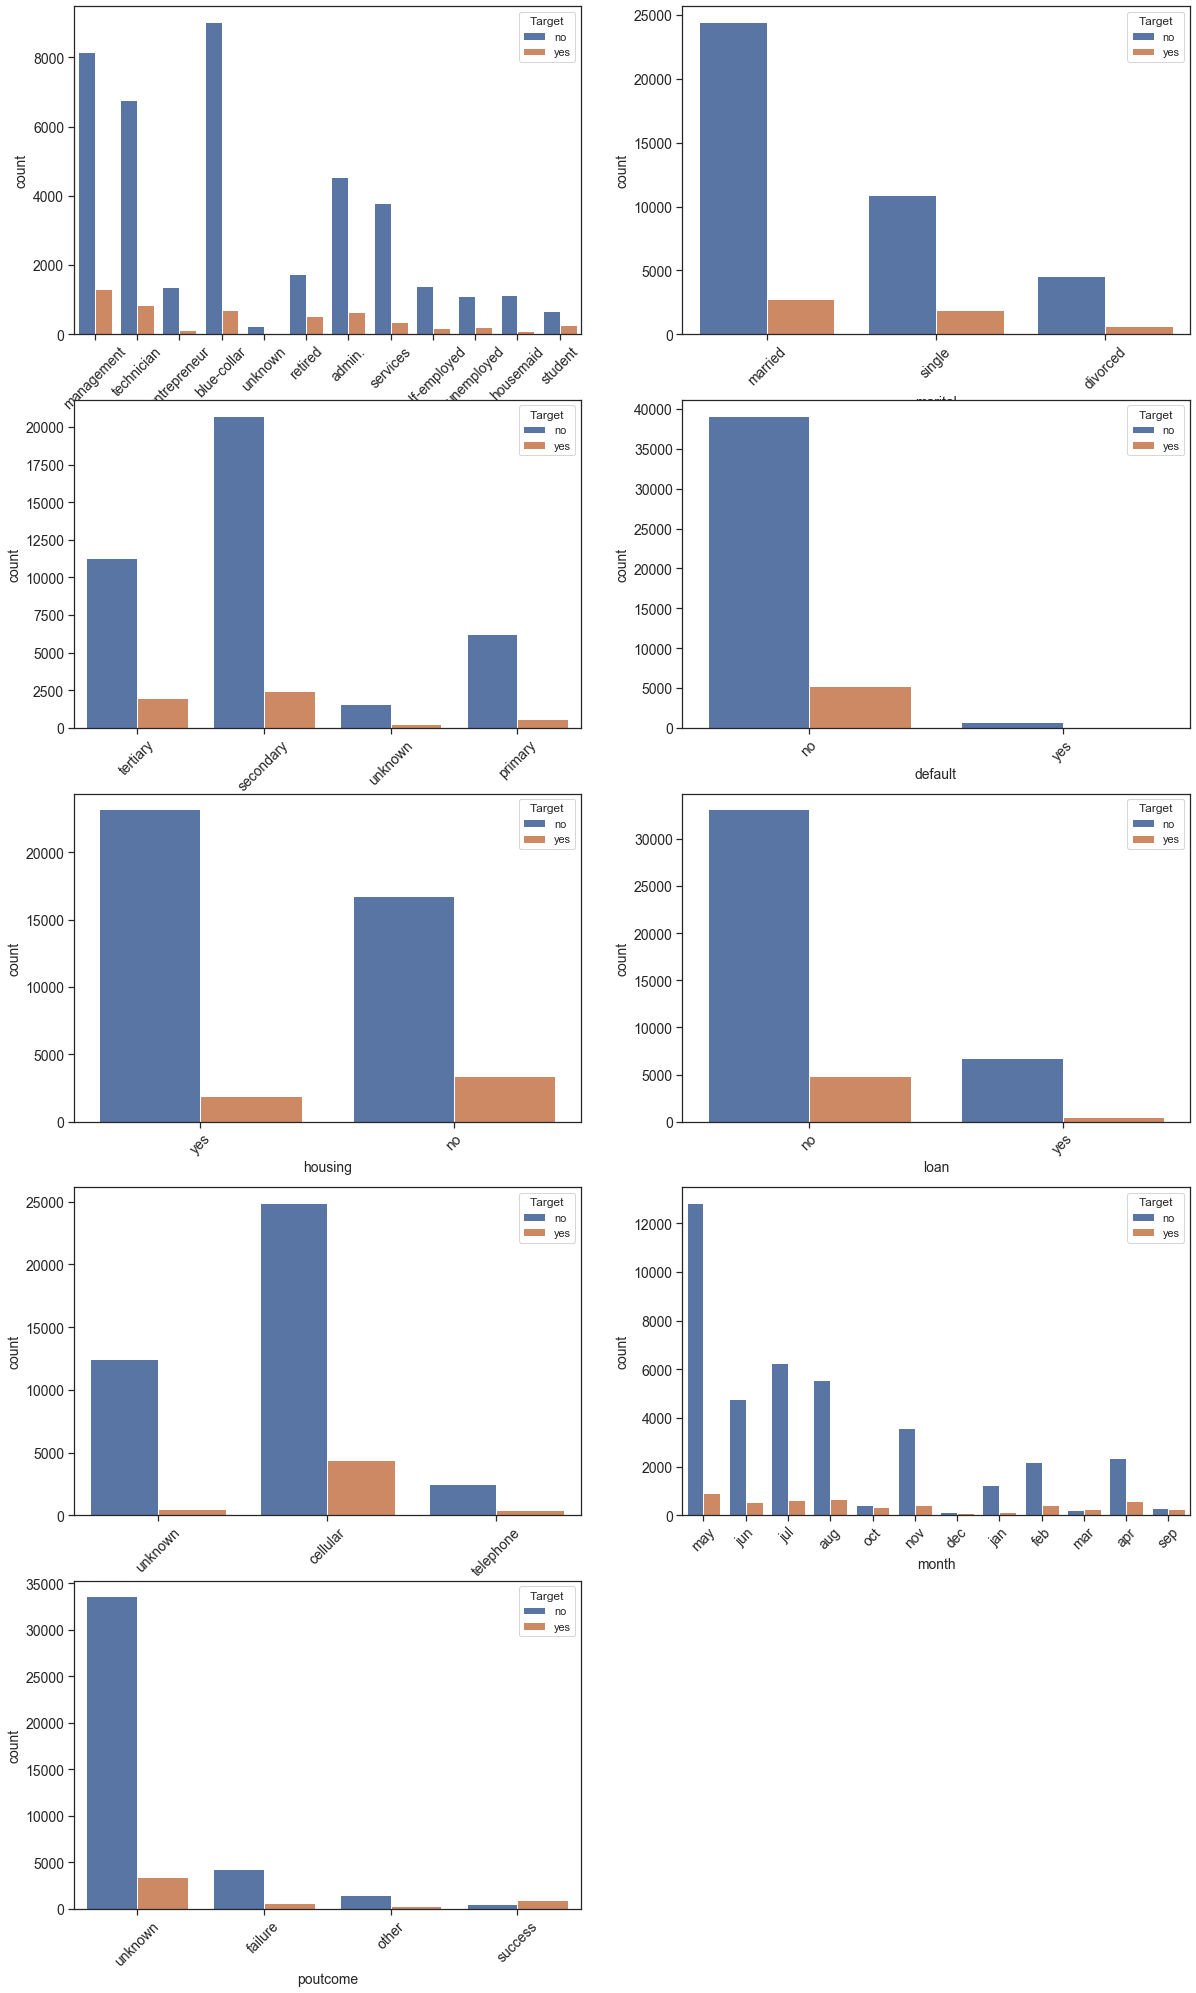

In [13]:
fig = plt.figure(figsize=(20, 35))
for feature, num in zip(bankCampaign.select_dtypes(exclude=['int64']).columns, range(1, len(bankCampaign.dtypes[bankCampaign.dtypes != 'int64']) + 1)):
    if feature != 'Target':
        ax = fig.add_subplot(5, 2, num)
        chart = sns.countplot(x=feature, hue='Target', data=bankCampaign)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

There are a lot of **'unknown'** values that need imputation. These can be replaced by the mode of the values in that column for further processing

## Multivariate plotting for outliers
We need to investigate the nature of the outliers for each of the **numeric** columns. This will help us understand how the values need to be normalized. Decision can also be taken to omit the outliers completely or whether they can be brought into the range for better predictability

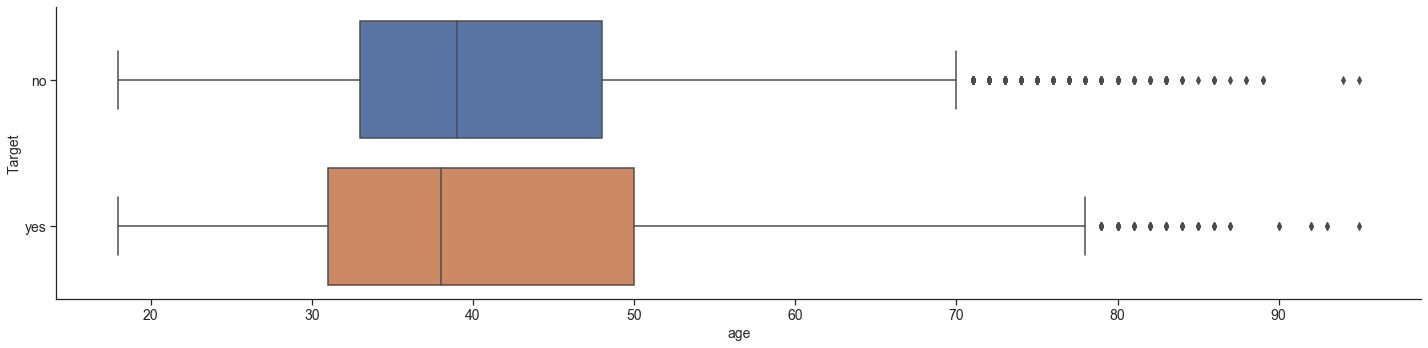

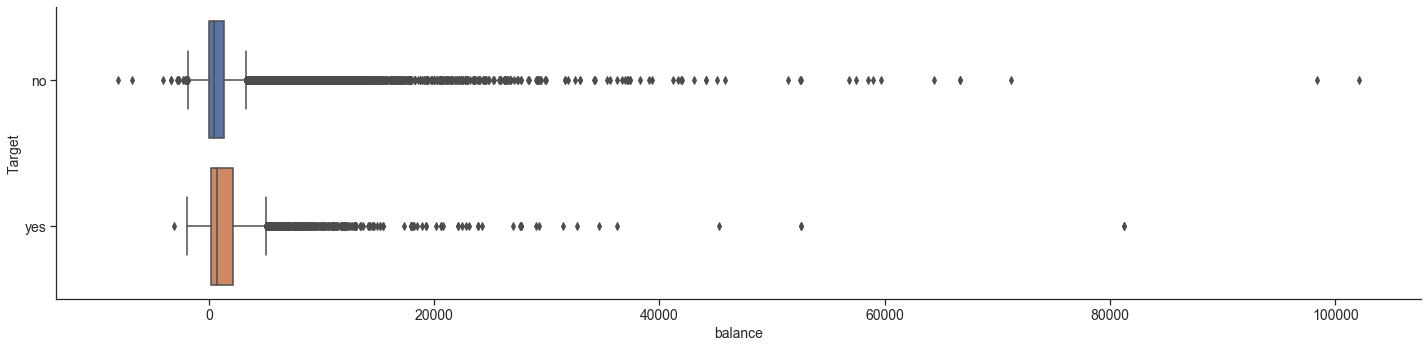

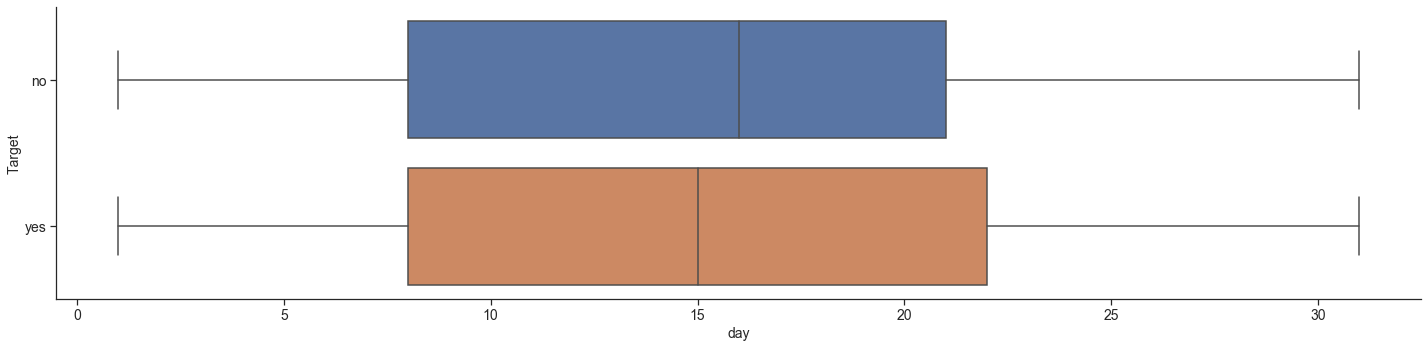

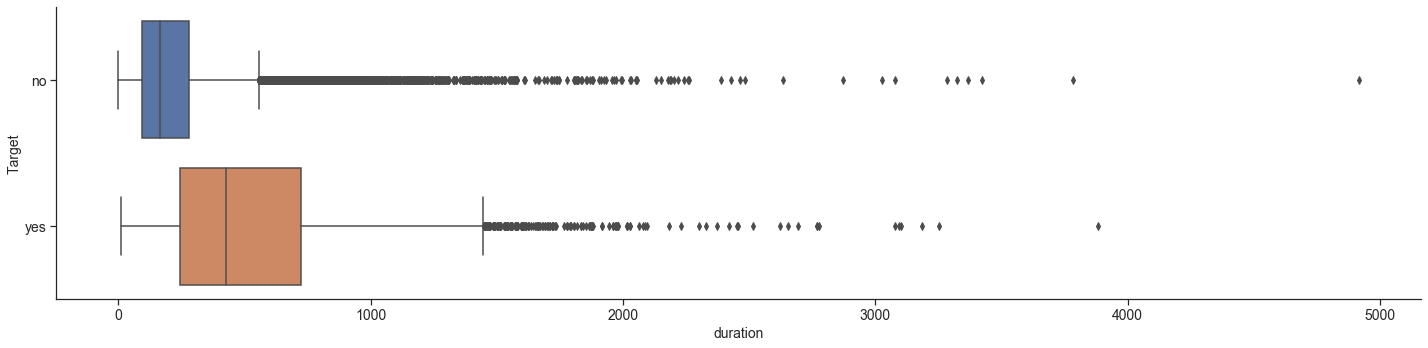

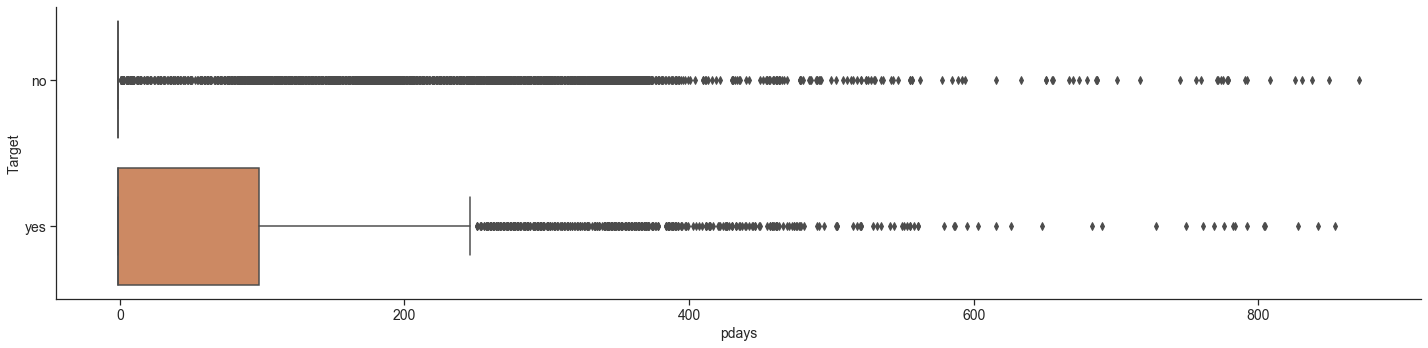

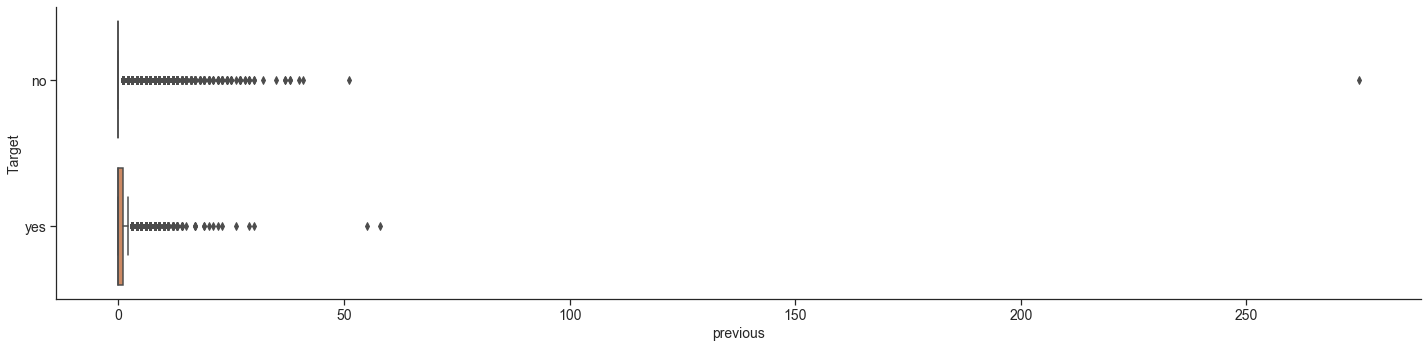

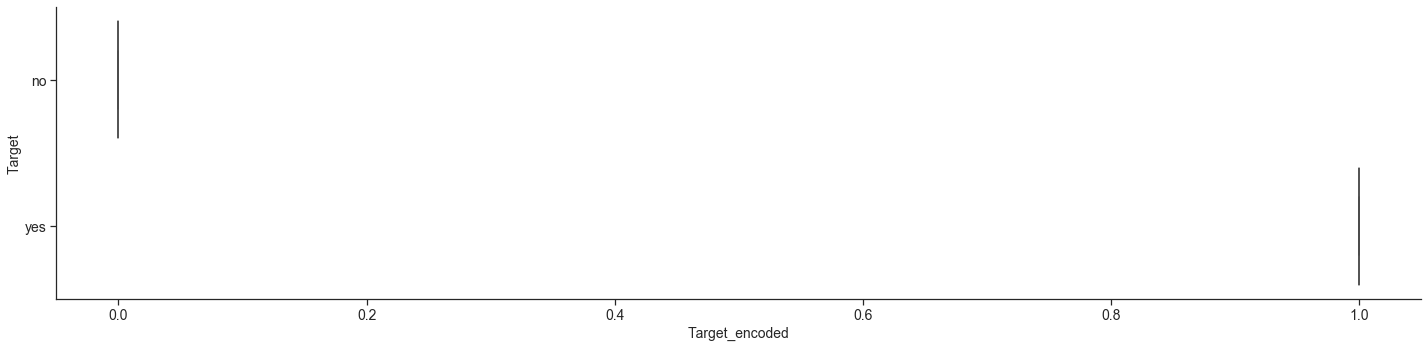

In [14]:
for feature in bankCampaign.select_dtypes(include=['int64']).columns:
    sns.catplot(x=feature, y='Target', kind='box', aspect=4, data=bankCampaign)
    plt.show()

## Data Imputation
A look at the above plots reveals the fact that there are a lot of outliers for **age**, **balance**, **campaign**, **pdays** and **previous** columns. These need to either be imputed or entirely removed. 

Before starting the scaling, we need to impute the **'unknown'** values in the categorical columns. 'unknown' values are replaced with the most frequent values found in that column. Also the **pdays** column has a lot of values that are -1. They mean the customer was not contacted. These can be imputed to 999.

In [15]:
imputer = Pipeline(
    steps=[('imputer_1', SimpleImputer(missing_values='unknown', strategy='most_frequent')),
           ('imputer_2', SimpleImputer(missing_values=-1, strategy='constant', fill_value=999))])

preprocessor = ColumnTransformer(transformers=[('imputer', imputer, 
                                                ['job', 'education', 'contact', 'poutcome', 'pdays'])])
preprocessor.fit(bankCampaign)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('imputer',
                                 Pipeline(memory=None,
                                          steps=[('imputer_1',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values='unknown',
                                                                strategy='most_frequent',
                                                                verbose=0)),
                                                 ('imputer_2',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
  

The imputed values are set back into the dataframe for further processing. The existing columns are kept as is and new columns are inserted with **'imputed_'** prefix for back reference. 

This enables us to see how the variables have evolved during processing especially since we have original data.

In [16]:
transformed_values = preprocessor.transform(bankCampaign)
bankCampaign['imputed_job'] = pd.Series(transformed_values[:,0])
bankCampaign['imputed_education'] = pd.Series(transformed_values[:,1])
bankCampaign['imputed_contact'] = pd.Series(transformed_values[:,2])
bankCampaign['imputed_poutcome'] = pd.Series(transformed_values[:,3])
bankCampaign['imputed_pdays'] = pd.Series(transformed_values[:,4])
bankCampaign.insert(10, 'category_day', pd.Categorical(bankCampaign.day))

## Scaling/Normalization of Outliers in numerical features

We observed in the plots in section 4.3 above that the numerical columns have outliers that need to be scaled down to make it within the inter quartile range or eliminated completely. Elimination can reduce the size of the dataset as certain columns have a lot of outliers and elimination may not be a right approach. 

Let us choose to not eliminate the outliers and instead bring those within the interquartile range so they can also contribute to the predictions. 

Various scaling transformations are investigated below.

In [17]:
numeric_features = bankCampaign.iloc[:, [0, 5, 12, 14, 22]]

distributions = {
    'Unscaled data': numeric_features,
    'Data after standard scaling': StandardScaler().fit_transform(numeric_features),
    'Data after min-max scaling' : MinMaxScaler().fit_transform(numeric_features),
    'Data after max-abs scaling': MaxAbsScaler().fit_transform(numeric_features),
    'Data after robust scaling': RobustScaler(quantile_range=(25, 75)).fit_transform(numeric_features),
    'Data after power transformation (Yeo-Johnson)' : PowerTransformer(method='yeo-johnson').fit_transform(numeric_features),
    'Data after quantile transformation (gaussian pdf)' : QuantileTransformer(output_distribution='normal').fit_transform(numeric_features),
    'Data after quantile transformation (uniform pdf)': QuantileTransformer(output_distribution='uniform').fit_transform(numeric_features),
    'Data after sample-wise L2 normalizing': Normalizer().fit_transform(numeric_features)
}

Different transformations are investigated to see the right fit. All the various transformers are listed in the selection box which can be chosen. Appropriate plots are shown below which gives an indication of the scale or each attribute against each other. This gives us an idea of how each variable scales are available in the dataset. If the scales of variables vary drastically it is not a good fit. Effort is required to make the scales uniform. 

**QuantileTransformer** with uniform output distribution is found to have the most uniform scale which makes the variable values uniform. **RobustScaler** is also an option that can be chose as see in its corresponding plots. However the outliers themselves are still present in the transformed data when that scaler is used. If a separate outlier clipping is desirable, a non-linear transformation is required which is what the **QuantileTransformer** does

The unscaled data is shown with the plots first. All the other transformers are listed in the select box and choosing each displays how the scaling changes the data and brings the values within the right scaling boundaries.

**Note:** If the selection is changed then all the prediction will need to be redone for the chosen scaled data. I have chosen the **QuantileTransformer** as the right fit.

In [18]:
bankCampaignDf = bankCampaign.copy()
@widgets.interact
def plot(scaler=distributions.keys()):
    df = pd.DataFrame(distributions[scaler], columns=['age', 'balance', 'duration', 'previous', 'imputed_pdays'])
    display(widgets.HBox([widgets.Label(value='Please wait. Rendering data for \'' + scaler + '\'')]))
    sns.pairplot(df)
    clear_output(wait=True)
    bankCampaignDf.update(df)

interactive(children=(Dropdown(description='scaler', options=('Unscaled data', 'Data after standard scaling', …

When using the **QuantileTransformer**, it is found that all the scales of the data is scalesed to between 0 and 1, thus making it uniform and comparable against each other. This can be seen from the above plots and the scales shown.

## Converting categorical columns for encoding

Converting all categorical columns to categories before processing

In [19]:
bankCampaignDf_Imp = bankCampaignDf.copy()
for feature in bankCampaignDf_Imp.columns: # Loop through all columns in the dataframe
    if bankCampaignDf_Imp[feature].dtype == 'object': # Only apply for columns with categorical strings
        bankCampaignDf_Imp[feature] = pd.Categorical(bankCampaignDf_Imp[feature])# Replace strings with an integer

# the x variables are picked up from the dataframe from the imputed and scaled values and originals dropped 
dropped_features = ['job', 'education', 'contact', 'day', 'pdays', 'poutcome', 'Target']
bankCampaignDf_Imp.drop(dropped_features ,axis=1, inplace=True)

Verify the columns before encoding

In [20]:
bankCampaignDf_Imp.head()

,age,marital,default,balance,housing,loan,category_day,month,duration,previous,Target_encoded,imputed_job,imputed_education,imputed_contact,imputed_poutcome,imputed_pdays
0,0.935435,married,no,0.822923,yes,no,5,may,0.671672,0.0,0,management,tertiary,cellular,failure,1.0
1,0.640641,single,no,0.208208,yes,no,5,may,0.413413,0.0,0,technician,secondary,cellular,failure,1.0
2,0.267768,married,no,0.167167,yes,yes,5,may,0.154655,0.0,0,entrepreneur,secondary,cellular,failure,1.0
3,0.718218,married,no,0.759760,yes,no,5,may,0.211211,0.0,0,blue-collar,secondary,cellular,failure,1.0
4,0.267768,single,no,0.163163,no,no,5,may,0.543544,0.0,0,blue-collar,secondary,cellular,failure,1.0


### Encoding categories
Creating the encoded values using dummies for all the categorical columns

In [21]:
bankCampaignDf_Clean = pd.get_dummies(bankCampaignDf_Imp, prefix=['category_day', 'month', 'imputed_job', 'marital', 'imputed_education', 'default', 'housing', 'loan', 'imputed_contact', 'imputed_poutcome'], columns=['category_day', 'month', 'imputed_job', 'marital', 'imputed_education', 'default', 'housing', 'loan', 'imputed_contact', 'imputed_poutcome'])
bankCampaignDf_Clean.info()
bankCampaignDf_Clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age                          45211 non-null  float64 
 1   balance                      45211 non-null  float64 
 2   duration                     45211 non-null  float64 
 3   previous                     45211 non-null  float64 
 4   Target_encoded               45211 non-null  int64   
 5   imputed_pdays                45211 non-null  category
 6   category_day_1               45211 non-null  uint8   
 7   category_day_2               45211 non-null  uint8   
 8   category_day_3               45211 non-null  uint8   
 9   category_day_4               45211 non-null  uint8   
 10  category_day_5               45211 non-null  uint8   
 11  category_day_6               45211 non-null  uint8   
 12  category_day_7               45211 non-null  uint8   
 13  c

,age,balance,duration,previous,Target_encoded,imputed_pdays,category_day_1,category_day_2,category_day_3,category_day_4,category_day_5,category_day_6,category_day_7,category_day_8,category_day_9,category_day_10,category_day_11,category_day_12,category_day_13,category_day_14,category_day_15,category_day_16,category_day_17,category_day_18,category_day_19,...,imputed_job_housemaid,imputed_job_management,imputed_job_retired,imputed_job_self-employed,imputed_job_services,imputed_job_student,imputed_job_technician,imputed_job_unemployed,marital_divorced,marital_married,marital_single,imputed_education_primary,imputed_education_secondary,imputed_education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,imputed_contact_cellular,imputed_contact_telephone,imputed_poutcome_failure,imputed_poutcome_other,imputed_poutcome_success
0,0.935435,0.822923,0.671672,0.0,0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0
1,0.640641,0.208208,0.413413,0.0,0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0
2,0.267768,0.167167,0.154655,0.0,0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0
3,0.718218,0.759760,0.211211,0.0,0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0
4,0.267768,0.163163,0.543544,0.0,0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


### Verify values of each column

A final check on the values to see the variation in values of each column

In [22]:
# Print each column values for unique ness
for column in bankCampaignDf_Clean.columns:
    print('---- ', column, ' ----')
    print(bankCampaignDf_Clean[column].value_counts())
    print('\n') 

----  age  ----
0.222723    2085
0.177678    1996
0.267768    1972
0.310811    1930
0.352853    1894
            ... 
0.999583       2
0.999750       2
0.999833       2
1.000000       2
0.999917       1
Name: age, Length: 77, dtype: int64


----  balance  ----
0.122122    3514
0.163163     195
0.167167     156
0.173173     139
0.170170     134
            ... 
0.996253       1
0.992701       1
0.977364       1
0.815228       1
0.000000       1
Name: balance, Length: 7168, dtype: int64


----  duration  ----
0.323824    188
0.203704    184
0.199700    177
0.253754    175
0.316316    175
           ... 
0.999212      1
0.998294      1
0.999386      1
0.999450      1
0.976042      1
Name: duration, Length: 1573, dtype: int64


----  previous  ----
0.000000    36954
0.847848     2772
0.901902     2106
0.937938     1142
0.958458      714
            ...  
0.999070        1
0.999074        1
0.999141        1
0.999130        1
1.000000        1
Name: previous, Length: 41, dtype: int64


----

This shows that all the values are accounted for and we can start the model building process

## Extract independent and target variable

X and y are extracted from the final dataframe. The class imbalance is investigated in the output variable to be used for calculating the class weights during modeling. The variation is plotted to check if the variation is uniformly available across the dataset.

Counter({0: 39922, 1: 5289})


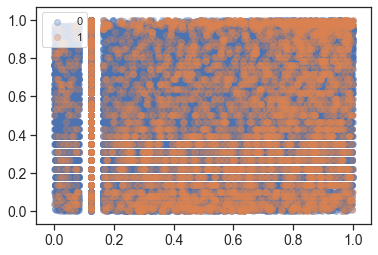

In [23]:
X = bankCampaignDf_Clean.loc[:, bankCampaignDf_Clean.columns != 'Target_encoded']

# Extracting the y or the target variable
y = bankCampaignDf_Clean['Target_encoded']

counter = Counter(y)
print(counter)

# scatter plot of examples by class variable
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X.iloc[row_ix, 1], X.iloc[row_ix, 0], label=str(label), alpha=0.3)
plt.legend()
plt.show()

The output variable has a ratio of 39922:5289. There is high class imbalance with 'no' values occuring the most.

# Model Preprocessing

## Split the data into training and test set

In [24]:
# Splitting the data by 70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# verify the data is randomized by looking at the ID field.
X_train.head()

,age,balance,duration,previous,imputed_pdays,category_day_1,category_day_2,category_day_3,category_day_4,category_day_5,category_day_6,category_day_7,category_day_8,category_day_9,category_day_10,category_day_11,category_day_12,category_day_13,category_day_14,category_day_15,category_day_16,category_day_17,category_day_18,category_day_19,category_day_20,...,imputed_job_housemaid,imputed_job_management,imputed_job_retired,imputed_job_self-employed,imputed_job_services,imputed_job_student,imputed_job_technician,imputed_job_unemployed,marital_divorced,marital_married,marital_single,imputed_education_primary,imputed_education_secondary,imputed_education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,imputed_contact_cellular,imputed_contact_telephone,imputed_poutcome_failure,imputed_poutcome_other,imputed_poutcome_success
6149,0.222723,0.040513,0.843844,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0
12403,0.310811,0.016946,0.278278,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0
21645,0.222723,0.396396,0.466466,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0
29580,0.393894,0.188188,0.409910,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0
31245,0.009009,0.516850,0.191692,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [25]:
print("Original Bank Campaign True Values    : {0} ({1:0.2f}%)".format(len(bankCampaignDf_Clean.loc[bankCampaignDf_Clean['Target_encoded'] == 1]), (len(bankCampaignDf_Clean.loc[bankCampaignDf_Clean['Target_encoded'] == 1])/len(bankCampaignDf_Clean.index)) * 100))
print("Original Bank Campaign False Values   : {0} ({1:0.2f}%)".format(len(bankCampaignDf_Clean.loc[bankCampaignDf_Clean['Target_encoded'] == 0]), (len(bankCampaignDf_Clean.loc[bankCampaignDf_Clean['Target_encoded'] == 0])/len(bankCampaignDf_Clean.index)) * 100))
print("")
print("Training Bank Campaign True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Bank Campaign False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Bank Campaign True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Bank Campaign False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Bank Campaign True Values    : 5289 (11.70%)
Original Bank Campaign False Values   : 39922 (88.30%)

Training Bank Campaign True Values    : 3738 (11.81%)
Training Bank Campaign False Values   : 27909 (88.19%)

Test Bank Campaign True Values        : 1551 (11.43%)
Test Bank Campaign False Values       : 12013 (88.57%)



The ratio of **test** vs **train** on the output values is fairly uniform as compared to the full dataset

# Model Training

## Class weights of target variable

In [26]:
print_class_weights([0, 1], y)

[0.56624167 4.27405937]


In [27]:
class_weights = {0: 0.56624167, 1: 4.27405937}

## Baselining the performance

We first use a baseline estimator for creating a baseline model to establish our first model performance. This will be used for comparison as we improve the accuracy for future models during tuning. I have used a Logistic Regression model and Decision Tree as my baseline estimators

### Logistic Regression

Accuracy = 90.2610%.
Model Score Summary for Logistic Regression
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.66      0.31      0.42      1551

    accuracy                           0.90     13564
   macro avg       0.79      0.64      0.68     13564
weighted avg       0.89      0.90      0.89     13564

ROC Curve Plots and Characteristics
------------------------------------------------------


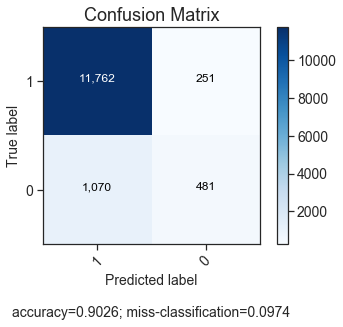

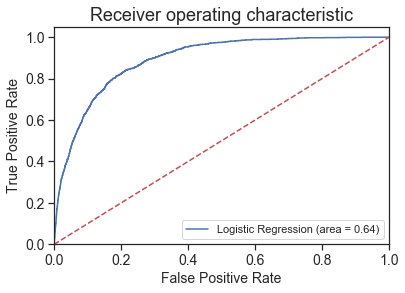

liblinear 0.8990741617471131
newton-cg 0.899421751028999
lbfgs 0.8993269523182614
sag 0.899421751028999
saga 0.8994533486023053


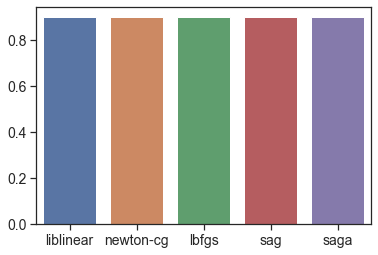

In [28]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
parameters = dict(solver=solver_list)

LR_model = LogisticRegression(C=1, random_state=1)
grid_search_LR = GridSearchCV(LR_model, parameters, cv=2)
grid_search_LR.fit(X_train, y_train)
best_grid_LR = grid_search_LR.best_estimator_
GSV_LR_predictions = best_grid_LR.predict(X_test)
print_model_performance(best_grid_LR, X_test, y_test)
print_model_score('Logistic Regression', y_test, GSV_LR_predictions)
plot_confusion_matrix(cm           = metrics.confusion_matrix(y_test, GSV_LR_predictions), 
                      normalize    = False,
                      target_names = [1, 0],
                      title        = "Confusion Matrix")
plot_roc_curve(best_grid_LR, 'Logistic Regression', X_test, y_test)
scores = grid_search_LR.cv_results_['mean_test_score']
for score, solver in zip(scores, solver_list):
    print(solver, score)
sns.barplot(solver_list, scores)

Accuracy is 90%. Area under the curve is 0.64. Precision and recall for class 0 is high (92% and 98%) but is medium for class 1 (66% and 31%).

### Decision Tree Model

A Decision Tree is used with some base default values to make some predictions. The accuracy and confusion matrix for the base estimator is printed below for reference

Accuracy = 86.8844%.
Model Score Summary for DecisionTree
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12013
           1       0.43      0.42      0.42      1551

    accuracy                           0.87     13564
   macro avg       0.68      0.67      0.67     13564
weighted avg       0.87      0.87      0.87     13564

ROC Curve Plots and Characteristics
------------------------------------------------------


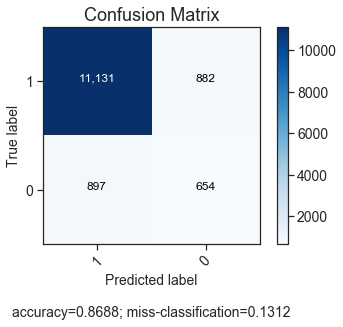

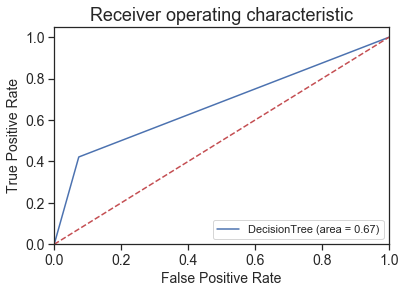

In [29]:
# approximate class weights are taken from the above ratio to give more penalty to higher class variable value
DT_model = DecisionTreeClassifier(criterion = 'entropy', random_state=1, class_weight=class_weights, max_features='auto')
DT_model.fit(X_train, y_train)
DT_predictions = DT_model.predict(X_test)
print_model_performance(DT_model, X_test, y_test)
print_model_score('DecisionTree', y_test, DT_predictions)
plot_confusion_matrix(cm           = metrics.confusion_matrix(y_test, DT_predictions), 
                      normalize    = False,
                      target_names = [1, 0],
                      title        = "Confusion Matrix")
plot_roc_curve(DT_model, 'DecisionTree', X_test, y_test)

Accuracy is 88%. The precision and recall for class 0 has not changed. The recall for class 1 has improved however the precision for class 1 has reduced. This means where it actually predicted a 1 it is only correct 43% of the time.

The above models provide a valuable information in terms of feature importances on the baseline estimator. This can be used to choose relevant features based on their importances and eliminate those that done have a significant impact.

### Feature importance threshold

All the features are plotted by their importances. Below data gives the option to alter the feature importances and chose the right set of features above a certain threshold. A **threshold** value of **0.005** is chosen for processing. However, different values can still be chosen by altering the slider to alter the number of features that can be included. Feature importances are taken from the Decision Tree model.

In [243]:
min_val, max_val, mid_val = feature_importance_range(DT_model)
@widgets.interact(threshold = (min_val, max_val, 0.0005), readout_format='.4f')
def render_threshold(threshold = min_val):
    key_features = plot_feature_importance(DT_model, X.columns, threshold)

interactive(children=(FloatSlider(value=0.00102, description='threshold', max=0.34107, min=0.00102, step=0.000…

### Test Train Split

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X[key_features], y, test_size=0.3, random_state=1)

### Ada Boost Classifier
Boosting is an ensemble technique that attempts to create a strong classifier from a number of weak classifiers. This is done by building a model from the training data, then creating a second model that attempts to correct the errors from the first model. Models are added until the training set is predicted perfectly or a maximum number of models are added. 

Adaptive Boosting classifier is chosen as the first model for starting the process of model enhancement. We start of with a base model with 100 estimators

**Algorithm**
* Adaptive boosting helps in combining multiple weak learners into a single strong learner. 
* This algorithm can start is perfectly ok with weak learners and as the iteration happens it improves on the learning of the previous estimator by giving more weights to the wrong predictions so that the next estimator can focus on getting those samples
* It gives less weight to those samples that are correctly classified and does this adaptively

Decision Tree from the earlier trial is used as the base estimator for adapting boosting since AdaBoost is best used to boost the performance of decision trees on binary classification problems.

Accuracy = 87.4005%.
Model Score Summary for AdaBoost Classifier
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12013
           1       0.45      0.46      0.45      1551

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564

ROC Curve Plots and Characteristics
------------------------------------------------------


No handles with labels found to put in legend.


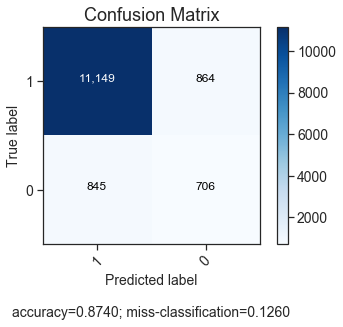

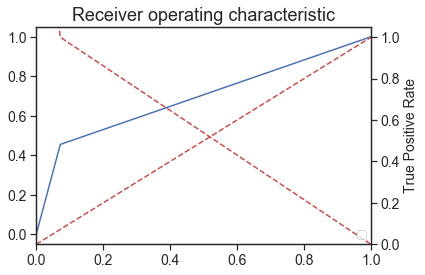

In [572]:
AB_model = AdaBoostClassifier(base_estimator=DT_model, n_estimators=100, random_state=1)
AB_model.fit(X_train, y_train)
AB_predictions = AB_model.predict(X_test)
#Print the feature importance of the AdaBoost
#AB_feature_importances = pd.DataFrame(AB_model.feature_importances_, columns = ["Imp"], index = X_train.columns)
print_model_performance(AB_model, X_test, y_test)
print_model_score('AdaBoost Classifier', y_test, AB_predictions)
plot_confusion_matrix(cm           = metrics.confusion_matrix(y_test, AB_predictions), 
                      normalize    = False,
                      target_names = [1, 0],
                      title        = "Confusion Matrix")
plot_roc_curve(AB_model, 'AdaBoost Classifier', X_test, y_test)

The recall on the class 1 has reduced while that of class 0 has remained fairly constant. Though the precision has increased slightly, We will want to eliminate the impact of overfitting. This can be done by using the same model with cross validation and trying various hyper parameters. 

**Note:** Attempt was made with more parameters, however adding more parameters added more fits and the process of fit was taking a considerable amount of time due to the size of data. However, the results were found to be fairly same with very slight improvement.

### Grid Search on AdaBoosting

Purpose: This step is chosen for doing cross validation on the data set to make sure we are avoiding over fitting on the model. The step involves breaking the data set into different folds making one split as the test set and the remaining as the training set. The experiment is done by changing the test set every time and thus it ensures our model is not sensitive to different training sets, thus enables reduce in bias and variance.

Advantages: Since the test data is varied across the dataset, it cross validates against different training sets to see if variation in the training sets influences the model. Bias and variance can be cross validated using this approach.

**n_estimators**, **learning_rate** and **algorithm** are used with different values. n_estimator is used to control the number of estimating steps to use to do the boosting. learning_rate is the rate used to improve on the previous learner

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.9min finished


{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 150}
Accuracy = 89.9071%.
Model Score Summary for Adaboost with Grid Search Classifier
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12013
           1       0.60      0.34      0.44      1551

    accuracy                           0.90     13564
   macro avg       0.76      0.66      0.69     13564
weighted avg       0.88      0.90      0.89     13564

ROC Curve Plots and Characteristics
------------------------------------------------------


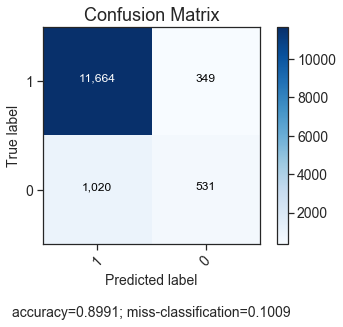

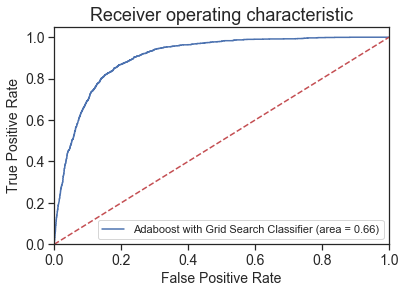

In [257]:
#Reducing the parameters for faster processing. 
#Since huge number of parameters increases the number of combinations, it was taking a longer tim to process
GSV_AB_param_grid = {
    'n_estimators' : [100, 150],
    'learning_rate' : [0.5, 1.0],
    'algorithm' : ['SAMME', 'SAMME.R']
}
# Instantiate the grid search model
grid_search_AB = GridSearchCV(estimator = AB_model, param_grid = GSV_AB_param_grid, cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search_AB.fit(X_train, y_train)
print(grid_search_AB.best_params_)
best_grid_AB = grid_search_AB.best_estimator_
GSV_AB_predictions = best_grid_AB.predict(X_test)
print_model_performance(best_grid_AB, X_test, y_test)
print_model_score('Adaboost with Grid Search Classifier', y_test, GSV_AB_predictions)
plot_confusion_matrix(cm           = metrics.confusion_matrix(y_test, GSV_AB_predictions), 
                      normalize    = False,
                      target_names = [1, 0],
                      title        = "Confusion Matrix")
plot_roc_curve(best_grid_AB, 'Adaboost with Grid Search Classifier', X_test, y_test)

The recall score of class 1 has reduced. This means impact of variation in hyperparameter is low. This could mean adding more training data to improve the overall score. 

Let us verify using the validation curve if increasing the training data has an impact on the score for each of the hyper parameters.

### Verification Curve for AdaBoost

Verification curve will help us to understand if there is an impact of under for a given hyper parameter. The training scores and validation scores are plotted. If the training score is good but the validation score is poor it means we have an overfitted model. If both the training and validation scores are low, it means we have an underfitted model

We use 2 hyper parameters with different values and plot the validation curve.

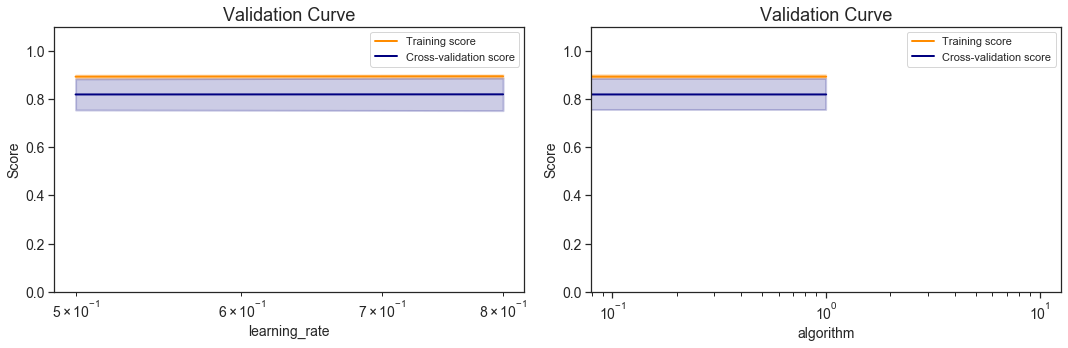

In [321]:
best_grid_AB_param_info = {
    'learning_rate' : [0.5, 0.8],
    'algorithm' : ['SAMME', 'SAMME.R']
}
fig = plt.figure(figsize=(15, 5))
for param, num in zip(best_grid_AB_param_info.keys(), range(1, len(best_grid_AB_param_info.keys()) + 1)):
    ax = fig.add_subplot(1, 2, num)
    estimator_validation_curve(best_grid_AB, X, y, ax, 'Validation Curve', param, best_grid_AB_param_info[param], 'f1_weighted')
plt.tight_layout()
plt.show()

The above plot shows that the learning and the validation scores are fairly constant and is correctly fitted.

The modification of hyper parameters also has not improved the recall or precision score. We can tweak the threshold values to improve the TPR and reduce the FPR and find an optimum value such that the precision and recall is maximum if this classifier is to be used.

### Bagging Classifier

Bagging classifier is chosen as the next model for model enhancement. We start of with a base model with 100 estimators and 70% of the existing samples for each estimator.

Purpose: This algorithm builds on multiple models usually of the same type and does it in parallel from different subsamples of the training dataset with replacement. It randomly selects samples and trains on the data and the final output is averaged across the predictions of all the sub models.

Bagging Classifier performs on our base estimator which is the Decision Tree. We see that the scores are slightly better and has improved in terms of precision and recall scores for class 1 and 0.

Accuracy = 90.2315%.
Model Score Summary for Bagging Classifier
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.65      0.31      0.42      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.68     13564
weighted avg       0.89      0.90      0.89     13564

ROC Curve Plots and Characteristics
------------------------------------------------------


No handles with labels found to put in legend.


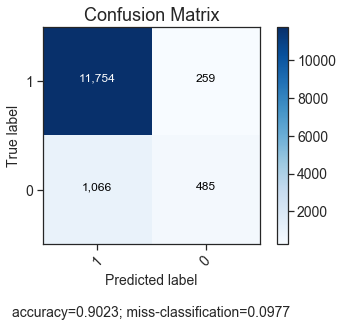

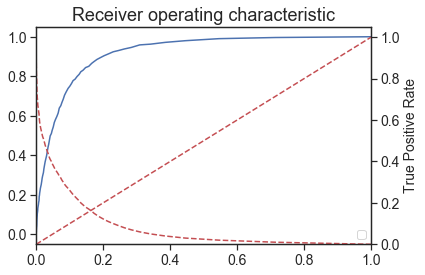

In [574]:
BG_model = BaggingClassifier(base_estimator=DT_model, n_estimators=100, max_samples= .7, bootstrap=True, random_state=1)
BG_model.fit(X_train, y_train)
BG_predictions = BG_model.predict(X_test)
print_model_performance(BG_model, X_test, y_test)
print_model_score('Bagging Classifier', y_test, BG_predictions)
plot_confusion_matrix(cm           = metrics.confusion_matrix(y_test, BG_predictions), 
                      normalize    = False,
                      target_names = [1, 0],
                      title        = "Confusion Matrix")
plot_roc_curve(BG_model, 'Bagging Classifier', X_test, y_test)

The area under curve has improved. Recall for class 1 has improved slightly however the precision has reduced slightly.

### Gradient Boosting Classifier

Gradient Boosting classifier is chosen as the next model. We start of with a base model with 100 estimators and a learning rate of 0.05.

Purpose: This is one of the best technique available for improving performance via ensembles. It combines many weak learning models together to create a strong predictive model. It improves on the learning of the previous model by calculating the deviance from the value and correct the weights acordingly.

Accuracy = 90.3568%.
Model Score Summary for Gradient Boosting Classifier
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.64      0.35      0.45      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

ROC Curve Plots and Characteristics
------------------------------------------------------


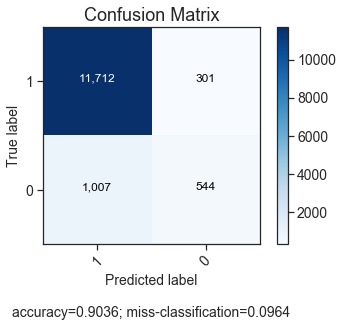

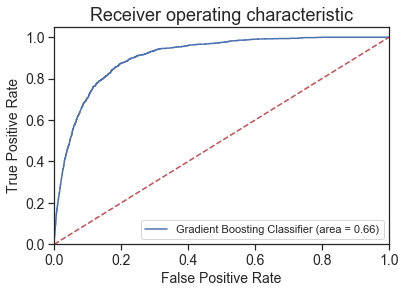

In [248]:
GB_model = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.05, random_state=1)
GB_model.fit(X_train, y_train)
GB_predictions = GB_model.predict(X_test)
print_model_performance(GB_model, X_test, y_test)
print_model_score('Gradient Boosting Classifier', y_test, GB_predictions)
plot_confusion_matrix(cm           = metrics.confusion_matrix(y_test, GB_predictions), 
                      normalize    = False,
                      target_names = [1, 0],
                      title        = "Confusion Matrix")
plot_roc_curve(GB_model, 'Gradient Boosting Classifier', X_test, y_test)

Model has improved on the precision of the lower class but has not improved on the class 1. 

Let us try cross validation on the same model by using various hyper parameters to see if a best model can be found.

**Note:** More values were tried however due the number of fits and size of data, the processing time was very high.

### Hyper parameter validation on Gradient Boosting

The same model is tried with cross validation using Grid Search for finding the most optimum hyper parameter. The number of fits is huge for the data set and is shown for illustration purpose. I have tried the same with 'criterion', 'learning_rate', 'loss', 'deviance', 'n_estimators' and 'min_samples_leaf'.

The model performance, ROC curve and confusion matrix are plotted below

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   21.2s finished


{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_features': 'log2', 'n_estimators': 150}
Accuracy = 90.4084%.
Model Score Summary for Gradient Boosting with Grid Search Classifier
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.62      0.40      0.49      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564

ROC Curve Plots and Characteristics
------------------------------------------------------


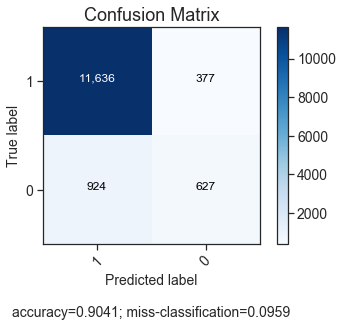

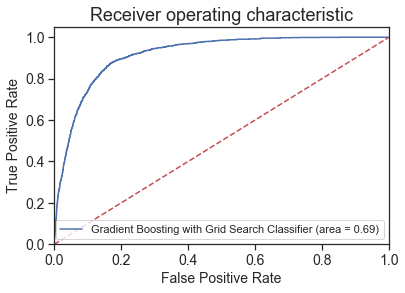

In [249]:
GSV_GB_param_grid = {
    "loss": ["deviance", "exponential"],
    "learning_rate": [0.2, 0.5, 1.0],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.7, 1.0],
    "criterion": ["friedman_mse"],
    "n_estimators":[100, 150],
    "min_samples_leaf":[5, 2, 1],
    "max_depth":[3, 5, 10],
    "min_impurity_split":[1e-5, 1e-7]
}
# Instantiate the grid search model
grid_search_GB = GridSearchCV(estimator = GB_model, param_grid = GSV_GB_param_grid, cv = 10, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search_GB.fit(X_train, y_train)
print('Best Parameters are: ')
print(grid_search_GB.best_params_)
best_grid_GB = grid_search_GB.best_estimator_
GSV_GB_predictions = best_grid_GB.predict(X_test)
print_model_performance(best_grid_GB, X_test, y_test)
print_model_score('Gradient Boosting with Grid Search Classifier', y_test, GSV_GB_predictions)
plot_confusion_matrix(cm           = metrics.confusion_matrix(y_test, GSV_GB_predictions), 
                      normalize    = False,
                      target_names = [1, 0],
                      title        = "Confusion Matrix")
plot_roc_curve(best_grid_GB, 'Gradient Boosting with Grid Search Classifier', X_test, y_test)

The area under the curve has increased with slight improvement in the class 1 precision and recall values.

### Verification Curve for Gradient Boost

Let us see if hyperparameters can be verified for checking if the model has underfit or overfit. This can be done by plotting the validation curve for different hyper parameters.

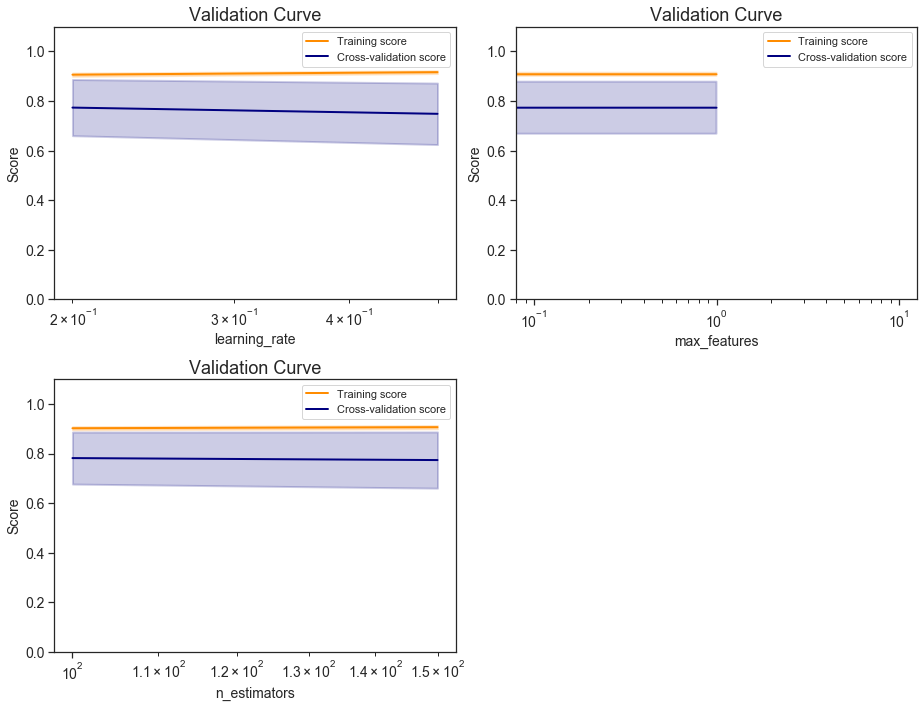

In [317]:
best_grid_GB_param_info = {
    'learning_rate' : [0.2, 0.5],
    'max_features' : ['log2', 'sqrt'],
    'n_estimators' : [100, 150]
}
fig = plt.figure(figsize=(13, 10))
for param, num in zip(best_grid_GB_param_info.keys(), range(1, len(best_grid_GB_param_info.keys()) + 1)):
    ax = fig.add_subplot(2, 2, num)
    estimator_validation_curve(best_grid_GB, X, y, ax, 'Validation Curve', param, best_grid_GB_param_info[param], 'f1_weighted')
plt.tight_layout()
plt.show()

The above plots show that variation in hyper parameters have no influence of the score and the model is correct fit.

### Random Forest Classifier

Random forest uses multiple decision trees to evaluate the prediction by taking the best out of all the trees. Since the algorithm takes different samples and also takes different combination of features, it can ensure that features that have less importance are ignored and those that impact the output are kept. This works with the best features available that can improve the overall score.

The trees have very low correlation and thus are independant to each other and hence improves scores without being biased to each other since the samples and features are picked at random. Uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions

Since the class weights are imbalanced, let us use the derived class weights of the 2 classes while fitting the model to see if it can influence the predictive power of the model and improve the score.

Accuracy = 82.6305%.
Model Score Summary for RandomForest Classifier
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     12013
           1       0.38      0.86      0.53      1551

    accuracy                           0.83     13564
   macro avg       0.68      0.84      0.71     13564
weighted avg       0.91      0.83      0.85     13564

ROC Curve Plots and Characteristics
------------------------------------------------------


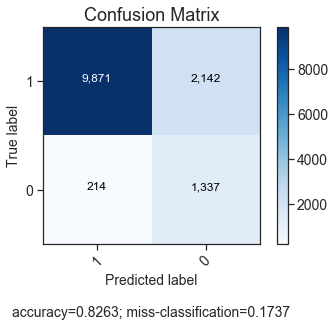

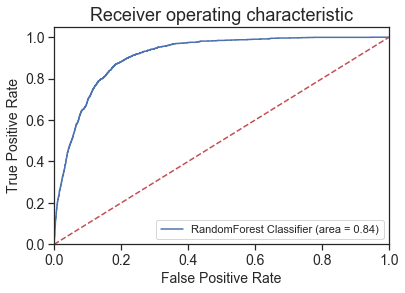

In [250]:
RF_model = RandomForestClassifier(n_estimators=150, class_weight=class_weights, criterion = 'entropy', max_depth = 10, min_samples_leaf=5, random_state=1)
RF_model.fit(X_train, y_train)
RF_predictions = RF_model.predict(X_test)
print_model_performance(RF_model, X_test, y_test)
print_model_score('RandomForest Classifier', y_test, RF_predictions)
plot_confusion_matrix(cm           = metrics.confusion_matrix(y_test, RF_predictions), 
                      normalize    = False,
                      target_names = [1, 0],
                      title        = "Confusion Matrix")
plot_roc_curve(RF_model, 'RandomForest Classifier', X_test, y_test)

We see that the predictive power of the model has a high value with improved precision and recall values on the training set. Area under the curve is also high. Precision value of class 1 is not improved much. However this model has good scope in classifying the values correctly when it was actually correct (high recall)

### Learning Curves of all ensembles

Let us plot the learning curves of all the models captured so far to see if adding more training data can influence the score of the models. it is a plot of the training score against the validation score on varied training sizes. We use cross validation to verify if the model **low variance and low bias** and is not sensitive to different training data.

In [ ]:
estimator_models = [
    ('RandomForest', RF_model),
    ('DecisionTree', DT_model),
    ('AdaBoost', AB_model),
    ('Bagging', BG_model),
    ('GradientBoost', GB_model),
    ('GridSearchGB', best_grid_GB),
    ('GridSearchAB', best_grid_AB),
    ('VotingClassifier', V_model),
    ('StackingClassifier', S_model)
]
fig = plt.figure(figsize=(13, 10))
for i in range(0, len(estimator_models)):
    ax = fig.add_subplot(5, 2, (i + 1))
    estimator_learning_curve(estimator_models[i][1], X, y, ax, 'Learning Curve [' + estimator_models[i][0] + ']')
plt.tight_layout()
plt.show()

**Note** The processing time is huge for the above plotting and hence the output was not rendered. 

However, the outcome of this would ideally be to see the how the score (y-axis) changes with the size of training data(x-axis) based on different training set sizes. If the scores go down, as x increases, then it means adding more training data will not help in improving the score. Whereas if the score goes up, then we can add more training data to improve the score of the estimators.

If adding more training data doesnot help, then we will have to look at the thresholds of the estimators  to improve the predictive power by ensuring we maximize precision and recall.

### Voting Classifier

Let us use a Majority Rule using all the classifiers used so far to find the best prediction out of the lot of all the classifiers together.

This classifier is used here especially to find the best predictions out of all the ensembles or estimators. This way we can ensure we get the best voted value out of all the predictions. 

Performance of the model is the best so far as the values are picked from the best predictions of all the ensembles.

Accuracy = 90.4158%.
Model Score Summary for Voting Classifier
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.62      0.43      0.51      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.70      0.73     13564
weighted avg       0.89      0.90      0.90     13564

ROC Curve Plots and Characteristics
------------------------------------------------------


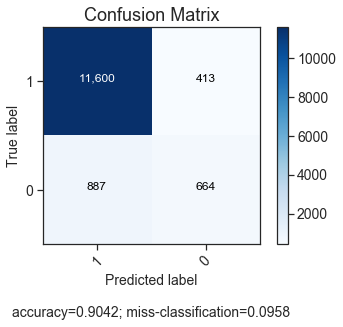

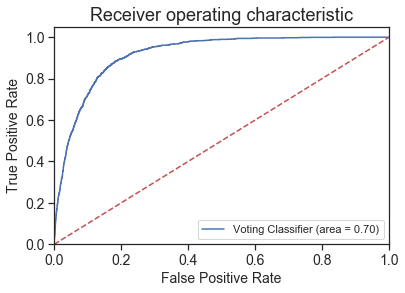

In [326]:
V_model = VotingClassifier(estimators=estimator_models, voting='soft')
V_model.fit(X_train, y_train)
V_predictions = V_model.predict(X_test)
print_model_performance(V_model, X_test, y_test)
print_model_score('Voting Classifier', y_test, V_predictions)
plot_confusion_matrix(cm           = metrics.confusion_matrix(y_test, V_predictions), 
                      normalize    = False,
                      target_names = [1, 0],
                      title        = "Confusion Matrix")
plot_roc_curve(V_model, 'Voting Classifier', X_test, y_test)

The above classifier has improved the precision to a great extent of class 1 without affecting the recall.  We could choose this as an alternative. However a precision recall curve can confirm if this is the right model to use.

### Stacking Classifier

Stacking classifier uses a meta model as a final estimator to fit based on the values predicted by all the sub models to improve the predictive power. I am using logistic regression as a final estimator to build the meta model which commbines the results of all the models used so far to improve the scores.

This uses another predictive model to find the best prediction instead of pure voting. This has the advantage of using a logistic regression function which i have used as the final estimator to predict the final output based on all the predicted values of all the previous estimators.

It is seen below from the scores and the overall precision and recall that this model is the best to be used for this problem. Reasoning for using this is illustrated in the next steps

Accuracy = 90.6075%.
Model Score Summary for Stacking Classifier
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.63      0.44      0.52      1551

    accuracy                           0.91     13564
   macro avg       0.78      0.70      0.73     13564
weighted avg       0.90      0.91      0.90     13564

ROC Curve Plots and Characteristics
------------------------------------------------------


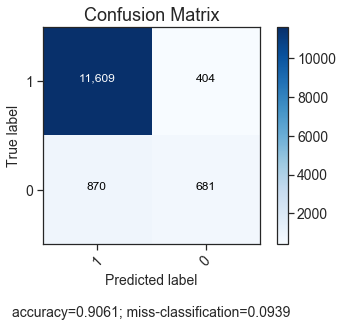

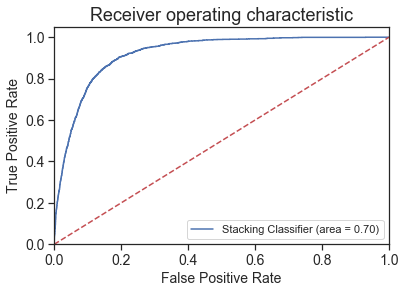

In [254]:
S_model = StackingClassifier(estimators=estimator_models, final_estimator=LogisticRegression())
S_model.fit(X_train, y_train)
S_predictions = S_model.predict(X_test)
print_model_performance(S_model, X_test, y_test)
print_model_score('Stacking Classifier', y_test, S_predictions)
plot_confusion_matrix(cm           = metrics.confusion_matrix(y_test, S_predictions), 
                      normalize    = False,
                      target_names = [1, 0],
                      title        = "Confusion Matrix")
plot_roc_curve(S_model, 'Stacking Classifier', X_test, y_test)

Plot shows an improvement in the area of the curve and also the precision and recall of the class 1 category. 

However since this is a highly imbalanced class, it would be worthwhile to verify the precision recall curve and the overall precision and recall scores to validate if this classifier is indeed a better one. 

### Plotting ROC Curves of all estimators

Let us plot the ROC curve of all the estimators so far in a single plot to see which of them has the highest area.

ROC Curve Plots
------------------------------------------------------


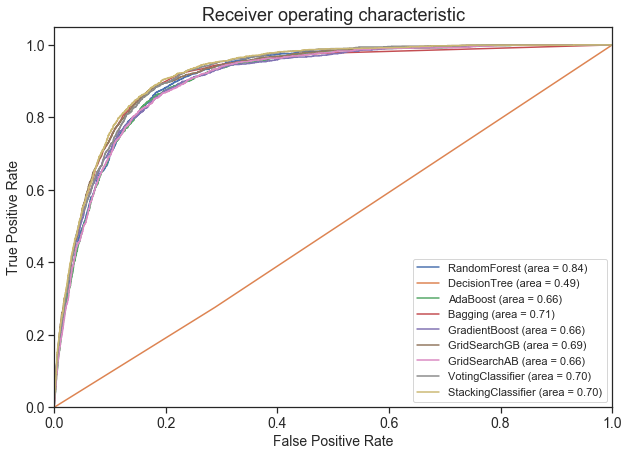

In [536]:
plot_roc_curves(estimator_models, X_test, y_test)

**Random Forest**, **BaggingClassifier**, **VotingClassifier**, **StackingClassifier** are typical candidates of the preferred model which can be shortlisted. However since this is a highly imbalanced class problem, it will be beneficial to take a look at the corresponding **Precision-Recall** curves for each of these classifiers.

### Precision Recall Curve
Since this is a highly imbalanced class problem, roc curve will not completely give a correct representation. We plot the precision-recall curve for each of the classifiers to cross validate and check which of these will be a better fit in terms of best precision and recall.

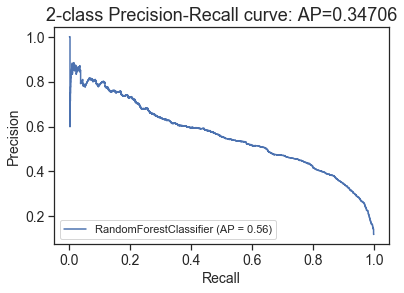

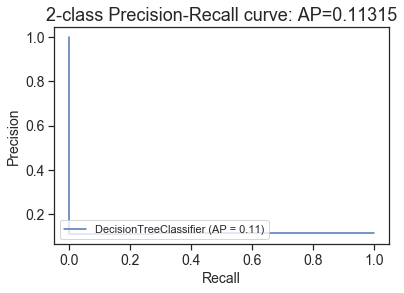

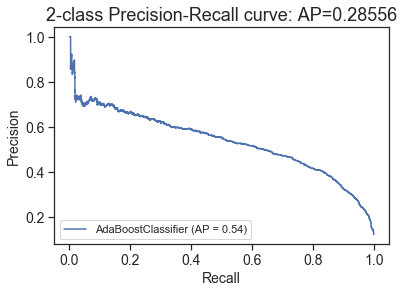

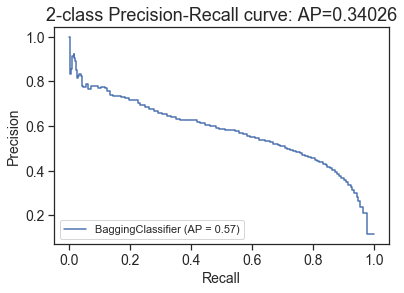

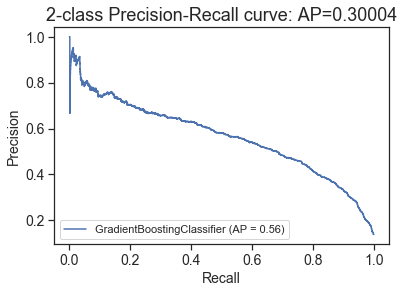

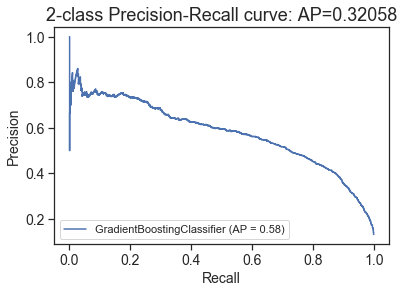

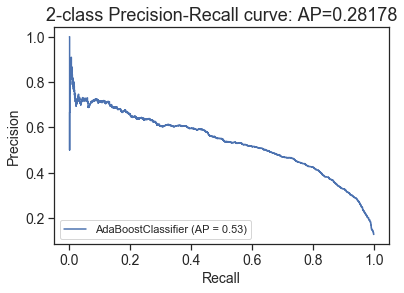

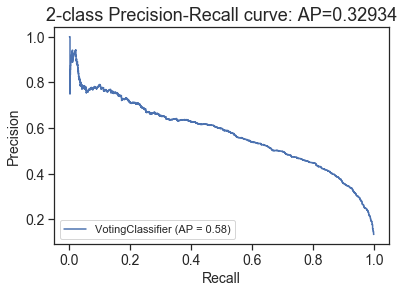

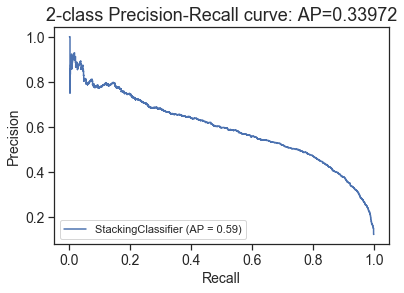

In [547]:
plot_estimator_precision_recall_curve(RF_model, X_test, y_test)
plot_estimator_precision_recall_curve(DT_model, X_test, y_test)
plot_estimator_precision_recall_curve(AB_model, X_test, y_test)
plot_estimator_precision_recall_curve(BG_model, X_test, y_test)
plot_estimator_precision_recall_curve(GB_model, X_test, y_test)
plot_estimator_precision_recall_curve(best_grid_GB, X_test, y_test)
plot_estimator_precision_recall_curve(best_grid_AB, X_test, y_test)
plot_estimator_precision_recall_curve(V_model, X_test, y_test)
plot_estimator_precision_recall_curve(S_model, X_test, y_test)

The above plots shows that StackingClassier model is the best fit model for the current problem as it has the highest area under the curve which signifies high precision and recall for this 2-class problem. 

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

Let us cross validate this observation by verifying the precision and recall for each of the fitted models.

In [575]:
estimators_scores(estimator_models, X_test, y_test).T

,precision,recall,fscore
RandomForest,0.910804,0.826305,0.852016
DecisionTree,0.795424,0.661973,0.716401
AdaBoost,0.883863,0.898924,0.887264
Bagging,0.894920,0.903716,0.898070
GradientBoost,0.889148,0.903568,0.890737
GridSearchGB,0.891908,0.904084,0.894885
GridSearchAB,0.883430,0.899071,0.886513
VotingClassifier,0.893240,0.904158,0.896442
StackingClassifier,0.895678,0.906075,0.898666


This shows that the Stacking classifier does indeed have a **high precision** and **recall** with the highest **f1score**.

### ROC Threshold Plot of chosen classifier

Let us plot the ROC curve of the chosen model to see what value of threshold can be used as a baseline to classify an observation as class 1.

ROC Curve Plots and Characteristics
------------------------------------------------------


No handles with labels found to put in legend.


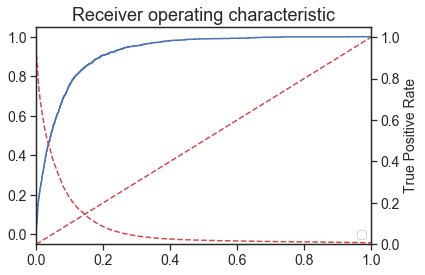

In [567]:
plot_roc_curve(S_model, 'Stacking Classifier', X_test, y_test)

The above shows the plot of thresholds on the ROC curve. The euclidean distance from the top left corner to the point on the curve is the ideal point at which the area is maximum. This point corresponds to a threshold of **0.15**. This threshold value can be used as the cutoff. Any predicted probability of the given class above this value can be treated as a positive subscription for term deposit.